# Proyecto de Ciencia de Datos: Clasificación de Quejas

En este proyecto, desarrollaremos un modelo de machine learning para predecir la categoría adecuada para cada nueva queja recibida. Comenzaremos importando las librerías necesarias y cargando el dataset inicial, el cual requiere limpieza y preparación antes de su uso.

## Preprocesamiento de Datos

In [1]:
import pandas as pd
import json

In [2]:
# Cargamos el archivo tickets_classification_eng.json que se encuentra en la carpeta data/raw_data.

file_path = './raw_data/tickets_classification_eng.json'

with open(file_path, 'r') as file:
    data = json.load(file)

In [3]:
df = pd.json_normalize(data)
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

Seleccionamos las columnas relevantes

In [5]:
df = df[['_source.complaint_what_happened', '_source.product', '_source.sub_product']]

Renombrar las columnas para que sean mas legibles

In [6]:
df.rename(columns={
    '_source.complaint_what_happened': 'complaint_what_happened',
    '_source.product': 'category',
    '_source.sub_product': 'sub_product'
}, inplace=True)

Creamos una nueva columna ticket_classification

In [7]:
df['ticket_classification'] = df['category'] + ' + ' + df['sub_product']

Eliminamos columnas redundantes

In [8]:
df.drop(columns=['category', 'sub_product'], inplace=True)

Limpiamos los datos en la columna complaint_what_happened

In [9]:
# Contar los Nulos en complaint_what_happened
df['complaint_what_happened'].isnull().sum()

0

In [10]:
# Revisar si hay campos vacios en complaint_what_happened
lambda x: x == ''
df['complaint_what_happened'].apply(lambda x: x == '').sum()

57241

In [11]:
# Revisar si hay nulos enmasacarados en complaint_what_happened
lambda x: x == 'nan' or x == 'NaN' or x == 'NAN' or x == 'n/a' or x == 'N/A' or x == '' or x == ' '
df['complaint_what_happened'].apply(lambda x: x == 'nan').sum()

0

In [12]:
# Reemplazamos por el nulo de pandas
df['complaint_what_happened'].replace('', pd.NA, inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_14996\3742695349.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['complaint_what_happened'].replace('', pd.NA, inplace=True)


In [13]:
# Revisar si hay campos vacios en complaint_what_happened de nuevo
lambda x: x == ''
df['complaint_what_happened'].apply(lambda x: x == '').sum()

0

In [14]:
# Contar los Nulos en complaint_what_happened otra vez
df['complaint_what_happened'].isnull().sum()

57241

Eliminamos las filas con datos faltantes en complaint_what_happened y ticket_classification

In [15]:
# Contral los nulos en ticket_classification y complaint_what_happened
df['ticket_classification'].isnull().sum()

10571

In [16]:
df['complaint_what_happened'].isnull().sum()

57241

In [17]:
df.dropna(subset=['complaint_what_happened', 'ticket_classification'], inplace=True)

In [18]:
# Contar si se eliminaron los nulos
df['complaint_what_happened'].isnull().sum()

0

In [19]:
df['ticket_classification'].isnull().sum()

0

reiniciamos el indice en el dataframe para que si este consecutivo despues de eliminar filas

In [20]:
df.reset_index(drop=True, inplace=True)

In [21]:
df

,complaint_what_happened,ticket_classification
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account
...,...,...
18958,My husband passed away. Chase bank put check o...,Checking or savings account + Checking account
18959,After being a Chase Card customer for well ove...,Credit card or prepaid card + General-purpose ...
18960,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card + General-purpose ...
18961,I am not familiar with XXXX pay and did not un...,Checking or savings account + Checking account


Guardamos el dataframe limpio en un nuevo archivo CSV

In [22]:
import os

# Creamos la carpeta clean_data si no existe
os.makedirs('data/clean_data', exist_ok=True)

df.to_csv('data/clean_data/cleaned_tickets.csv', index=False)

## EDA

In [23]:
df = pd.read_csv('./data/clean_data/cleaned_tickets.csv')
df

,complaint_what_happened,ticket_classification
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account
...,...,...
18958,My husband passed away. Chase bank put check o...,Checking or savings account + Checking account
18959,After being a Chase Card customer for well ove...,Credit card or prepaid card + General-purpose ...
18960,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card + General-purpose ...
18961,I am not familiar with XXXX pay and did not un...,Checking or savings account + Checking account


Vemos el contenido de las primeras filas para ver como quedo el dataframe

In [24]:
df.head()

,complaint_what_happened,ticket_classification
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account


complaint_what_happened: Contiene el texto de la queja del cliente.
ticket_classification: Es la combinación de la categoría y subcategoría del producto afectado.

Sacamos información del dataset

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18963 entries, 0 to 18962
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   complaint_what_happened  18963 non-null  object
 1   ticket_classification    18963 non-null  object
dtypes: object(2)
memory usage: 296.4+ KB


Ambas columnas son de tipo object, porque contienen texto.

In [26]:
df.describe()

,complaint_what_happened,ticket_classification
count,18963,18963
unique,18824,78
top,Chase has violated 15 USC 1692 by continuing c...,Credit card or prepaid card + General-purpose ...
freq,11,4918


complaint_what_happened:

- count: 18,963 (número total de quejas).
- unique: 18,824 (número de quejas únicas).
- top: El texto de la queja más frecuente.
- freq: 11 (esta queja específica aparece 11 veces).

ticket_classification:

- count: 18,963.
- unique: 78 (número de clasificaciones únicas).
- top: "Credit card or prepaid card + General-purpose credit card or charge card".
- freq: 4,918 (esta clasificación aparece 4,918 veces).

Interpretación:

- La mayoría de las quejas son únicas, entonces hay varios problemas reportados.
- La clasificación de tickets más común está relacionada con tarjetas de crédito, lo que mas les importa los clientes.

Analizamos como se distribuyen las categorias en el dataset

In [27]:
ticket_counts = df['ticket_classification'].value_counts()
ticket_counts.head(10)

ticket_classification
Credit card or prepaid card + General-purpose credit card or charge card                           4918
Checking or savings account + Checking account                                                     3788
Credit reporting, credit repair services, or other personal consumer reports + Credit reporting    2011
Bank account or service + Checking account                                                         1242
Mortgage + Conventional home mortgage                                                               955
Mortgage + Conventional fixed mortgage                                                              785
Mortgage + FHA mortgage                                                                             496
Debt collection + Credit card debt                                                                  427
Money transfer, virtual currency, or money service + Domestic (US) money transfer                   344
Bank account or service + Other bank produ

Vemos las categorias mas frecuentes en el dataset

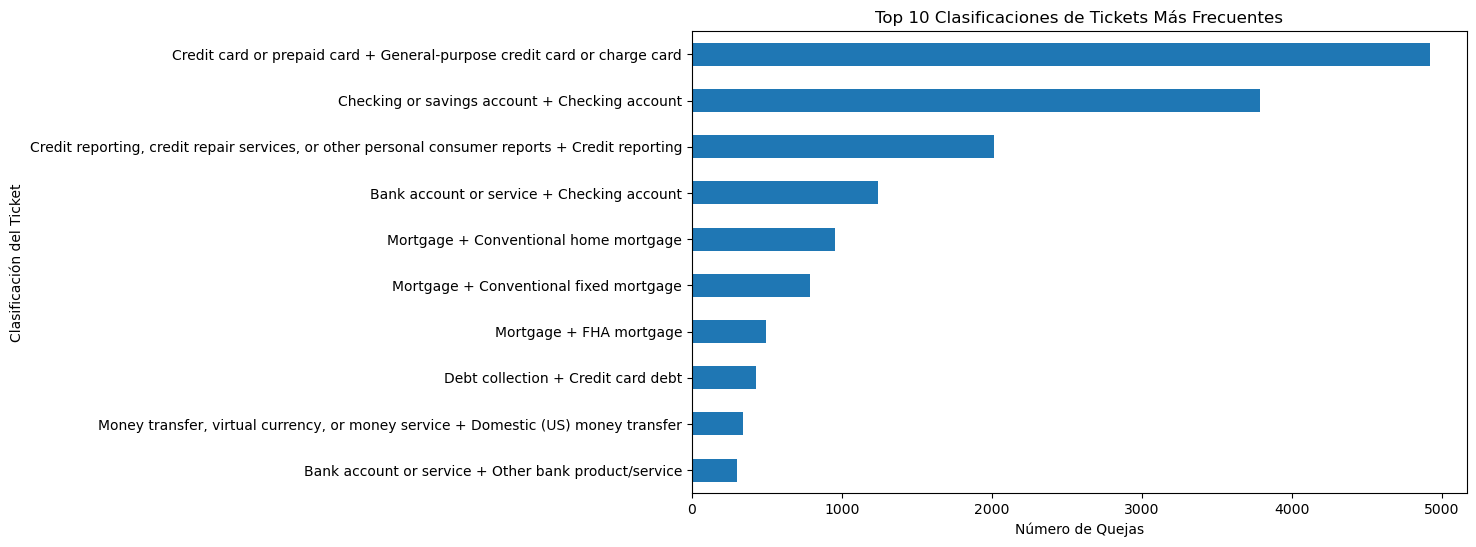

In [28]:
import matplotlib.pyplot as plt

ticket_counts.head(10).plot(kind='barh', figsize=(10,6))
plt.xlabel('Número de Quejas')
plt.ylabel('Clasificación del Ticket')
plt.title('Top 10 Clasificaciones de Tickets Más Frecuentes')
plt.gca().invert_yaxis()
plt.show()

Interpretación:

- Las quejas relacionadas con tarjetas de crédito y cuentas corrientes son las más comunes.
- Los problemas con informes de crédito y hipotecas también son comunes.
- La empresa podría enfocarse para mejorar el servicio al cliente y reducir el número de quejas.

Vemos la longitud de los textos de las quejas

In [29]:
df['complaint_length'] = df['complaint_what_happened'].str.len()
df['complaint_length'].describe()

count    18963.000000
mean      1411.152349
std       1550.977004
min         19.000000
25%        536.000000
50%        999.000000
75%       1760.000000
max      31611.000000
Name: complaint_length, dtype: float64

complaint_length:

- count: 18,963 (número total de quejas analizadas).
- mean: 1,411.15 caracteres (longitud media de las quejas).
- std: 1,550.98 caracteres (desviación estándar, alta variabilidad).
- min: 19 caracteres (queja más corta).
- 25%: 536 caracteres (el 25% de las quejas tienen menos de 536 caracteres).
- 50% (mediana): 999 caracteres.
- 75%: 1,760 caracteres (el 75% de las quejas tienen menos de 1,760 caracteres).
- max: 31,611 caracteres (queja más larga).

Interpretación:

- La longitud de las quejas varía mucho, desde muy cortas (19 caracteres) hasta muy largas (más de 31,000 caracteres).
- La mediana de 999 caracteres indica que la mitad de las quejas tienen menos de 1,000 caracteres.
- La alta desviación estándar inidcA que hay quejas MUY largas que podrían afectar el análisis y el procesamiento de texto.
-   Veremos como afecta la variabilidad al preprocesar los datos para el modelado.

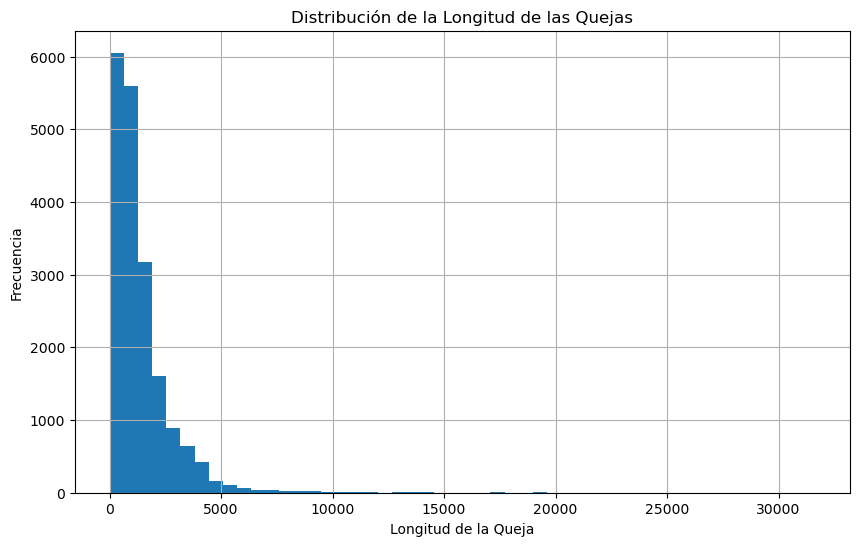

In [30]:
df['complaint_length'].hist(bins=50, figsize=(10,6))
plt.xlabel('Longitud de la Queja')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Longitud de las Quejas')
plt.show()

**Conclusiones Generales del EDA:**

1. **Diversidad en las Quejas:**  
   La mayoría de las quejas son únicas, las repetidas podrian ser del mismo usuario. Esto implica que el modelo debe ser capaz de manejar una variedad de temas y vocabulario.

2. **Áreas Principales de Quejas:**  
   Las categorías más frecuentes son:
   - Tarjetas de crédito y tarjetas prepagas.
   - Cuentas corrientes y de ahorro.
   - Informes de crédito y servicios de reparación de crédito.
   - Hipotecas.  
   
   Estas áreas son los principales puntos para los clientes y podrían ser utiles para mejorar los servicios y productos ofrecidos.

3. **Desbalance de Clases:**  
   Existe un desbalance en las clases de `ticket_classification`, con algunas categorías siendo mucho más frecuentes que otras. Esto deberiamos verlo durante el entrenamiento del modelo para evitar sesgos y mejorar la precisión en categorías menos representadas.

4. **Variabilidad en la Longitud de las Quejas:**  
   - Las quejas varían desde muy cortas hasta muuy largas.  
   - El preprocesamiento de texto deberá manejar eficientemente esta variabilidad, tal vez limitando la longitud máxima o utilizando técnicas que capturen información relevante independientemente de la longitud.

5. **Posibles Datos Duplicados:**  
   La existencia de una queja que aparece 11 veces sugiere posibles duplicados. Aunque el número es pequeño en relación al total de registros, podría ser beneficioso eliminar duplicados para mejorar la calidad del modelo.

**Implicaciones para el Modelado:**

- **Preprocesamiento de Texto:**
  - Limpiar y normalizar el texto (eliminar signos de puntuación, convertir a minúsculas, eliminar stopwords, etc.).
  - Considerar técnicas de lematización o stemming para reducir palabras a su forma base.
  - Manejar las quejas extremadamente largas y cortas, posiblemente estableciendo umbrales o utilizando padding/truncamiento.

- **Representación de Texto:**
  - Convertir el texto en representaciones numéricas utilizando técnicas como Bag of Words, TF-IDF, o embeddings como Word2Vec, GloVe, o modelos basados en Transformers (por ejemplo, BERT).

- **Manejo del Desbalance de Clases:**
  - Utilizar técnicas de resampling como sobremuestreo de clases minoritarias o submuestreo de clases mayoritarias.
  - Aplicar técnicas como penalización de clases en los algoritmos de aprendizaje o utilizar algoritmos robustos al desbalance de clases.

- **Selección de Modelos:**
  - Probar diferentes algoritmos de clasificación como Naive Bayes, Random Forest, Support Vector Machines, y modelos de Deep Learning.
  - Evaluar el desempeño con métricas adecuadas para clasificación multiclase y desbalanceada (por ejemplo, F1-score macro y weighted).

- **Validación Cruzada y Tuning de Hiperparámetros:**
  - Utilizar validación cruzada para obtener estimaciones más fiables del desempeño del modelo.
  - Realizar tuning de hiperparámetros utilizando técnicas como Grid Search o Random Search, posiblemente integrando con `mlflow` para el tracking de experimentos.


**Siguientes Pasos:**

1. **Ingeniería de Características y Preprocesamiento:**
   - Implementar las técnicas de preprocesamiento mencionadas.
   - Convertir el texto a una representación numérica adecuada.

2. **Entrenamiento y Evaluación de Modelos:**
   - Entrenar al menos dos modelos diferentes.
   - Realizar tuning de hiperparámetros para cada modelo.
   - Utilizar `mlflow` para el tracking de experimentos y registrar los modelos.

3. **Selección de Modelos Champion y Challenger:**
   - Seleccionar el modelo con mejor desempeño como Champion.
   - Seleccionar el segundo mejor modelo como Challenger.
   - Registrar ambos modelos en el Model Registry de `mlflow`.

4. **Implementación de la API y Frontend:**
   - Desplegar el modelo Champion mediante una API utilizando `fastapi` u otro framework.
   - Desarrollar un frontend sencillo con `streamlit` u otro framework para interactuar con la API.

5. **Orquestación y Contenerización:**
   - Crear un script con Prefect para orquestar el flujo de entrenamiento y registro de modelos.
   - Utilizar `docker-compose` para crear contenedores de la API y el frontend.

# Feature Engineering y Preprocesamiento de Datos

Preprocesaremos el texto y convertiremos las quejas en una representación numérica que pueda ser utilizada por algoritmos de machine learning.

In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
# Descargar las stopwords y el lematizador de nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Funcion para preprocesar y limpiar el texto de las quejas

In [33]:
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar URLs y direcciones de correo electrónico
    text = re.sub(r'http\S+|www.\S+|@\S+', '', text)
    
    # Eliminar números y caracteres especiales
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenización
    tokens = text.split()
    
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Reconstruir el texto
    text = ' '.join(tokens)
    return text

In [34]:
#Aplicamos la función de preprocesamiento a la columna complaint_what_happened.
df['clean_complaint'] = df['complaint_what_happened'].apply(preprocess_text)

In [36]:
# Observamos algunas filas para verificar que el preprocesamiento se realizó correctamente.
df[['complaint_what_happened', 'clean_complaint']]

,complaint_what_happened,clean_complaint
0,Good morning my name is XXXX XXXX and I apprec...,good morning name xxxx xxxx appreciate could h...
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,upgraded xxxx xxxx card xxxx told agent upgrad...
2,Chase Card was reported on XX/XX/2019. However...,chase card reported xxxx however fraudulent ap...
3,"On XX/XX/2018, while trying to book a XXXX XX...",xxxx trying book xxxx xxxx ticket came across ...
4,my grand son give me check for {$1600.00} i de...,grand son give check deposit chase account fun...
...,...,...
18958,My husband passed away. Chase bank put check o...,husband passed away chase bank put check hold ...
18959,After being a Chase Card customer for well ove...,chase card customer well decade offered multip...
18960,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",wednesday xxxxxxxx called chas xxxx xxxx visa ...
18961,I am not familiar with XXXX pay and did not un...,familiar xxxx pay understand great risk provid...


In [37]:
# Dividir el dataset en train test split
X = df['clean_complaint']
y = df['ticket_classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [38]:
# Convertimos el texto a vectores numericos usando TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [40]:
# Guardamos los datos preprocesados y el vectorizador para usarlos cuando entrenemos el modelo
import pickle

In [42]:
import os

# Crear la carpeta processed_data si no existe
os.makedirs('data/processed_data', exist_ok=True)

# Guardar los datos
with open('data/processed_data/X_train_tfidf.pkl', 'wb') as f:
    pickle.dump(X_train_tfidf, f)
    
with open('data/processed_data/X_test_tfidf.pkl', 'wb') as f:
    pickle.dump(X_test_tfidf, f)

In [44]:
# Guardar las etiquetas
y_train.to_csv('data/processed_data/y_train.csv', index=False)
y_test.to_csv('data/processed_data/y_test.csv', index=False)

# Crear la carpeta models si no existe
os.makedirs('models', exist_ok=True)

# Guardar el vectorizador
with open('models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

- Preprocesamiento de Texto: Limpiamos el texto eliminando URLs, correos electrónicos, números y caracteres especiales. Convertimos el texto a minúsculas, eliminamos stopwords y aplicamos lematización.
- Vectorización: Convertimos el texto preprocesado en una matriz de características numéricas utilizando TF-IDF.
- División de Datos: Separamos los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo,
- Guardar los Datos: Guardamos los datos procesados y el vectorizador para facilitar el entrenamiento de modelos.